In [1]:
import pandas as pd

In [2]:
#loading the phishing email data to dataframe
#
data0 = pd.read_csv('/Users/HP/projectML/email_pre_processed.csv')
data0.head()


,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject color printing special request additio...,1
4,subject money get software cd software compati...,1


In [3]:
data0.shape


(5728, 2)

(-0.5, 799.5, 599.5, -0.5)

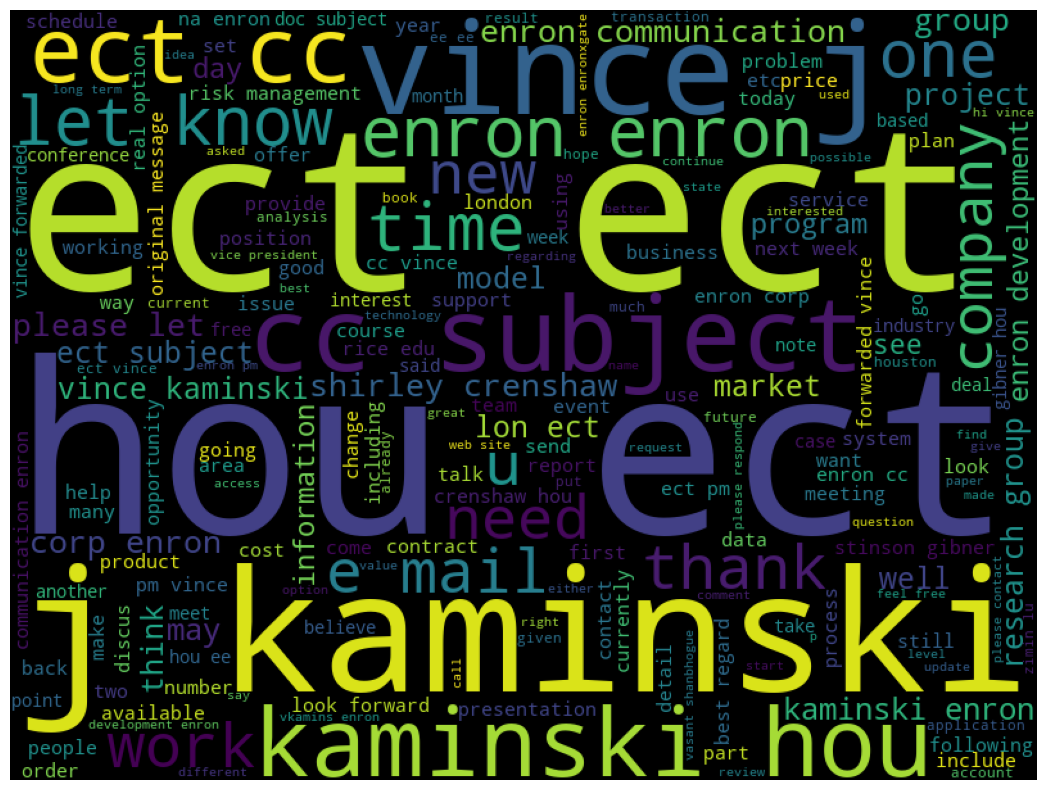

In [4]:
import matplotlib
import pylab as plt

#data visualization in terms of words number 
# 
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(data0['text'])) 
plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')

In [6]:
from sklearn.model_selection import train_test_split
X_train_email, X_test_email, y_train, y_test = train_test_split(data0['text'], 
                                                    data0['spam'], 
                                                    random_state=42)
# the split ratio is 25% by default
# Here data0['text'] is X and data0['spam'] is y for both test and training data
print('Number of rows in the total set: {}'.format(data0.shape[0]))
print('Number of rows in the training set: {}'.format(X_train_email.shape[0]))
print('Number of rows in the test set: {}'.format(X_test_email.shape[0]))

Number of rows in the total set: 5728
Number of rows in the training set: 4296
Number of rows in the test set: 1432


In [7]:
#Step 1: Initialize a dictionary about the trainning data set.
#
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(ngram_range=(1, 1), lowercase = True , stop_words =  'english')

count_vector.fit(X_train_email) 
# what are the words in our dictionary?
print(sorted(count_vector.vocabulary_))

#Step 2: Represent our email in training set in form of vector
#
# Fit the training data and then return the matrix
X_train = count_vector.fit_transform(X_train_email) 
# to get the the list of feature words that are lowercase with no puttutaion or stop words
#Since you fit transform X data training
# they convert data to integer data

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test = count_vector.transform(X_test_email)
#Since you transform X data testing
# they convert data to integer data

['aa', 'aaa', 'aadedeji', 'aagrawal', 'aal', 'aaldous', 'aall', 'aanalysis', 'aaron', 'aawesome', 'ab', 'aba', 'abacha', 'abacus', 'abahy', 'abaixo', 'abandon', 'abandoned', 'abandonment', 'abargain', 'abarr', 'abattoir', 'abb', 'abbas', 'abbott', 'abbreviated', 'abbreviation', 'abc', 'abcsearch', 'abdalla', 'abdallat', 'abdul', 'abdulla', 'abdullah', 'abeis', 'abel', 'abello', 'abetted', 'abeyance', 'abhay', 'abide', 'abidjan', 'abiiity', 'abilene', 'ability', 'abilmesi', 'abit', 'abitibi', 'abl', 'able', 'abler', 'abliged', 'ablx', 'ably', 'abn', 'abnegate', 'abnormal', 'abnormality', 'aboard', 'abolish', 'abook', 'aboriginal', 'abormalities', 'abort', 'abouts', 'aboutus', 'abovenet', 'abqewvbgf', 'abraham', 'abramowicz', 'abrams', 'abrasive', 'abreast', 'abreo', 'abridged', 'abroad', 'absconded', 'absence', 'absense', 'absent', 'absolute', 'absolutely', 'absolve', 'absolved', 'absorb', 'absorbing', 'absorbowac', 'absorption', 'absoutely', 'abstained', 'abstract', 'abstruse', 'absult

In [8]:
X_train_feature_list = count_vector.get_feature_names_out()
X_train_feature_list

array(['aa', 'aaa', 'aadedeji', ..., 'zzn', 'zzncacst', 'zzzz'],
      dtype=object)

In [9]:
doc_array =  X_train.toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
frequency_matrix_X_train = pd.DataFrame((doc_array),columns = X_train_feature_list)
frequency_matrix_X_train

,aa,aaa,aadedeji,aagrawal,aal,aaldous,aall,aanalysis,aaron,aawesome,...,zwrocic,zwwyw,zwzm,zxghlajf,zyc,zygoma,zymg,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Step 3: Using model for prediction.
# We are using Naive-Bayes, SVM, KNN, Randomforest
#
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train , y_train)

MultinomialNB()

In [12]:
predictions = naive_bayes.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [13]:
#Step 4: Using metrics to evaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.9874301675977654
Precision score:  0.9701897018970189
Recall score:  0.9808219178082191
F1 score:  0.9754768392370572


In [14]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision score: ', format(precision_score(y_pred,y_test)))
print('Recall score: ', format(recall_score(y_pred,y_test)))
print('F1 score: ', format(f1_score(y_pred,y_test))) 

Accuracy: 0.9839385474860335
Precision score:  0.959349593495935
Recall score:  0.9779005524861878
F1 score:  0.9685362517099864


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print('Precision score: ', format(precision_score(y_pred_knn,y_test)))
print('Recall score: ', format(recall_score(y_pred_knn,y_test)))
print('F1 score: ', format(f1_score(y_pred_knn,y_test))) 

Accuracy: 0.8987430167597765
Precision score:  0.6395663956639567
Recall score:  0.9516129032258065
F1 score:  0.7649918962722854


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print('Precision score: ', format(precision_score(y_pred_rf,y_test)))
print('Recall score: ', format(recall_score(y_pred_rf,y_test)))
print('F1 score: ', format(f1_score(y_pred_rf,y_test))) 

Accuracy: 0.9776536312849162
Precision score:  0.9132791327913279
Recall score:  1.0
F1 score:  0.9546742209631728
